# Принятие решений в бизнесе

<div>  <img src="https://uchebnik.mos.ru/system_2/atomic_objects/files/007/029/030/original/shutterstock_173563589.jpg", alt="Квадрат" , align="top">
</div>

#### Контекст
В работе крупного интернет-магазина нужно постоянно обрабатывать множество данных, следить за метриками, оценивать работу магазина на основе данных, чтобы принимать взвешенные решения. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. 

#### Наша задача: 
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

### Описание данных

Данные для первой части

Файл `hypothesis.csv`
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл `orders.csv`
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл `visitors.csv`
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


 <font size="4" ><a id="Содержание"></a>
    
   ***Содержание***    
- [1. Приоритизация гипотез](#1)
- [2. Анализ A/B-теста](#2)
- [3. Вывод](#3)

### [Часть 1. Приоритизация гипотез](#Содержание) <a id="1"></a> 

В файле `hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Импортируем библиотеки, прочитаем файл с гипотезами

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math as mth
import datetime as dt
pd.set_option('display.max_colwidth', -1)

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Задача

    Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    Узнать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

In [4]:
#Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Среди 9 гипотез лидирующее место по ICE (влияние, уверенность, усилия) занимает гипотеза №8. На первый взгляд она отличается от остальных прямой денежной выгодой для клиента, в таком случае бизнес недополучит прибыль. На мой взгляд нулявая гипотеза имеет больше шансов на коммерческий успех, и не сильно уступает лидеру в оценке ICE.

In [5]:
#Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


- С учетом оценки охвата пользователей, по фреймворку RICE(влияние, уверенность, усилия, охват) лидирует гипотеза №7, причем с двухкратным отрывом от другиx гипотез. 
- Следует обратить внимание, что с учетом охвата гипотеза №8 занимает середину нашего рейтинга среди альтернативных вариантов. И только гипотезы 0 и 7 сохраняют места в тройке лидеров по двум фреймворкам.

- Вывод: 
параметр Reach дает представление, как гипотеза видет себя при оценке охвата пользователей. Поэтому гипотеза 7 лидирует, безусловно, с точки зрения охвата, e-mail рассылка эффективнее остальных вариантов. Но возникают вопросы, касаемо конверсии привлеченых пользоателей к активным по данному источнику. Гипотеза 8 эффективна для ограниченного круга пользователей, при оценке параметра Reach получила минимальный бал, так как с ростом числа пользователей растет рандомность дня рождения всех пользователей и непонятная перспектива привлечения новых пользователей и приблизительная дата их покупки.

### [Часть 2. Анализ A/B-теста](#Содержание) <a id="2"></a> 

Получили результаты A/B-тест, они записаны в файлах `orders.csv` и `visitors.csv`

Прочитаем файлы и посмотрим на их содержимое

In [6]:
orders= pd.read_csv('orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors= pd.read_csv('visitors.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [7]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.tail(5)

,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


Файл `orders.csv` содержит выручку по группам, дату покупки, номер транзакции и принадлежность к пользователю.

In [9]:
orders_pivot = orders.pivot_table(index='group', values='revenue',aggfunc=['sum','mean'])
orders_pivot

,sum,mean
,revenue,revenue
group,,
A,4084803,7333.578097
B,5907760,9230.875000


Группа B выглядит получше, выручка и средний чек выше, чем у группы A

In [10]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.tail(5)

,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


Файл `visitors.csv` содержит дату визита пользователя по группам и количество визитов

In [12]:
visitors_pivot = visitors.pivot_table(index='group', values='visitors',aggfunc=['sum','mean'])
visitors_pivot

,sum,mean
,visitors,visitors
group,,
A,18736,604.387097
B,18916,610.193548


Разделение по группам корректное для анализа групп, примерно равное количество посещений 

In [13]:
total_group = orders_pivot.merge(visitors_pivot,on='group', how='inner')
total_group.columns = ['total_revenue','mean_revenue','total_visitors', 'mean_visitors']
total_group

,total_revenue,mean_revenue,total_visitors,mean_visitors
group,,,,
A,4084803,7333.578097,18736,604.387097
B,5907760,9230.875000,18916,610.193548


На первый взгляд группа B принесла больше выручки, общее количество поьзователей примерно одинаково с небольшим преимуществом в сторону группы B. Но даже несколько десятков пользователей могли осуществить аномально дорогие покупки.

### Задача
#### Проанализируем A/B-тест:

Подготовка к анализу

In [14]:
orders[['date','group']].count()

date     1197
group    1197
dtype: int64

In [15]:
1197 - orders[orders['group'] == 'A']['group'].count() - orders[orders['group'] == 'A']['group'].count()

83

До обработки дубликатов группа B имеет больше транзакций заказов, чем группа A на 83 чека. 

In [16]:
#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups
#в итоге ordersAggregated имеет агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]
                              .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 
                                    'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
                              .sort_values(by=['date','group'])

#в итоге visitorsAggregated имеет агрегированные кумулятивные по дням данные о посещениях 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])]
                                 .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                 .sort_values(by=['date','group'])

#объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия, получился сводный комулятивный отчет с накопленным итогом
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [17]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Построем график кумулятивной выручки по группам. Сделаем выводы и предположения.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


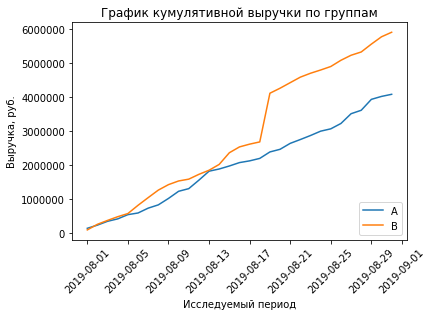

In [18]:
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

#Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=45)
plt.xlabel('Исследуемый период')
plt.ylabel('Выручка, руб.')
plt.title('График кумулятивной выручки по группам')
plt.legend(loc=4);

- В течение первых 5 дней выручка идентично увеличвается, сказывается сезонность. после группа A показывает степенной рост выручки, в то время как рост группы B показывает рост чуть больше. 
- В середине месяца 13 августа их комулятивная выручка находится в одной отметки. После их пути расходятся, группа A продолжает показывать степенной рост, а группа B до 18 агуста приросла также, как и вначале месяца, а потом показала экспотенциальный рост резкими скачком за несколько дней. 

#### Вывод: 
Так вот величина комулятивной выручки группы B 19 августа достигается группой A только в сентябре  и похоже замедляется. После 19 августа обе группы показывают степенной рост паралельно друг другу. 19 августа произошел вспелск заказов группы B, который ни как не повлиял на группа A.

Построем график кумулятивного среднего чека по группам

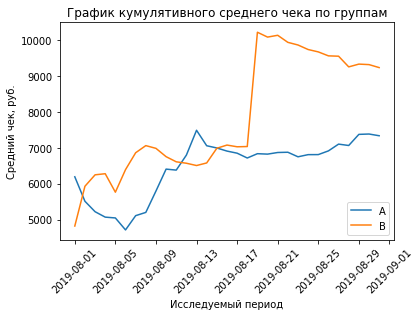

In [19]:
#группа А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

#группа B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation=45)
plt.xlabel('Исследуемый период')
plt.ylabel('Средний чек, руб.')
plt.title('График кумулятивного среднего чека по группам')
plt.legend(loc=4)

Данный график очень шумный. На первый взгляд вспелск среднего чека с 18 по 19 августа выглядит как выброс, потому что потом кривая группы B возвращается в исходное положение плавным спуском, а кривая группы A минимально вырастает. Есть предположение, что где то в середине сентября они пересекутся, при условии отсутсвия всплесков. 

Причиной вспелска может быть не только дорогие покупки новых клиентов, но и дорогие покупки старых клиентов.

Построем график относительного изменения кумулятивного среднего чека группы B к группе A

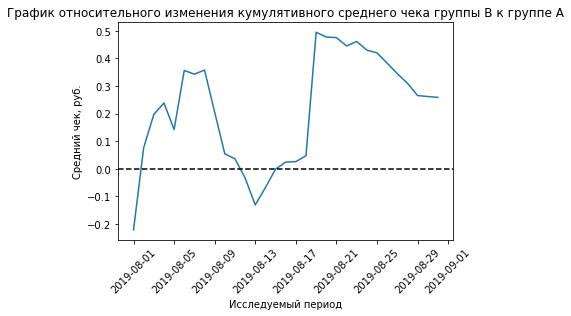

In [20]:
#собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

#cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.xticks(rotation=45)
plt.xlabel('Исследуемый период')
plt.ylabel('Средний чек, руб.')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

#добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

Резкий скачек относительного изменения среднего чека в период с 18 по 19 августа объясняет наличие крупных заказов в группе B.

Построем график кумулятивной конверсии по группам

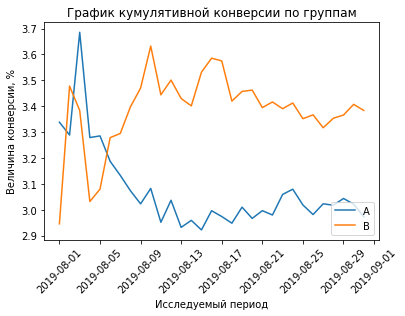

In [21]:
#считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#строим графики, для маштабности графика скоректируем значения на 100
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion']*100, label='A') 
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion']*100, label='B')

plt.xticks(rotation=45)
plt.xlabel('Исследуемый период')
plt.ylabel('Величина конверсии, %')
plt.title('График кумулятивной конверсии по группам')
plt.legend(loc=4)

#задаем масштаб осей
#plt.axis(["2019-08-01", '2019-09-01', 0, 5])

- Наблюдается определенная симметрия. В начале периода конверсия по группам шумная, конверсия группы A выше, потом начинает снижаться, пересекается с уровнем конверсии группы в период с 5 по 6 мая. 
- Конверсия группы B растет, имеет несколько пиков, т.е. в эти периоды либо число заказов выросло при равном числе визитов, либо при равном числе заказов, число визитов сократилось. Скорее предположим, что первый вариант более вероятный. 

#### Вывод:
Отметим два пика конверсии группы B, данные пики свидетельствуют о наличии выбросов. Кстати, конверсия группы A была получше конверсии группы B в период с 1 по 5 мая за счет не пропорционального соотношение в группах количества пользователей и заказов. У группы A было получше. 

После 17 августа данные стабилизировались

Построем график относительного изменения кумулятивной конверсии группы B к группе A

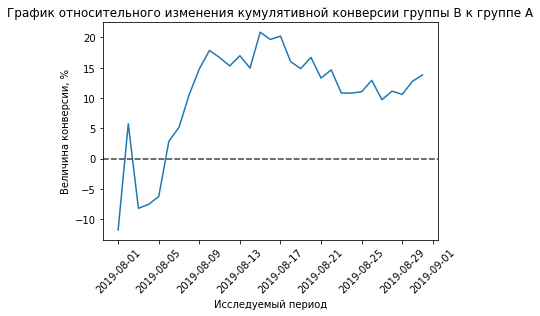

In [22]:
#производим слияние кумулитивных конверсий двух групп
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#строим график
plt.plot(mergedCumulativeConversions['date'], (mergedCumulativeConversions['conversionB']/
                                               mergedCumulativeConversions['conversionA']-1) * 100)

plt.xticks(rotation=45)
plt.xlabel('Исследуемый период')
plt.ylabel('Величина конверсии, %')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
#plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6])

#### Вывод: 
Вслед за всплеском коммулитивной конверсии группы B, отношение данной группы к группе A стабильно растет. После 18-19 августа наблюдается небольшой спад и фиксация результатов соотношения групп примерно на одном уровне 10-15%. Переходя к проверки статистических гипотез проведем анализ раздельно по аномалиям и данные без учета выбросов. 

Построем точечный график количества заказов по пользователям

Text(0.5, 1.0, 'Точечный график количества заказов по пользователям')

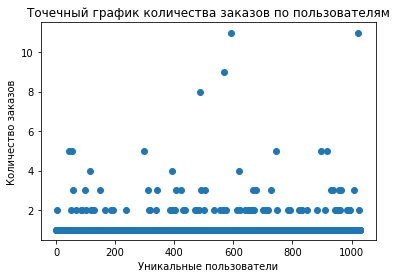

In [23]:
#для этого нужно найти число заказов по пользователям — создать df c двумя столбцами: 'userId' и 'orders'
ordersByUsers = orders.drop(['date','group', 'revenue'], axis=1).groupby('visitorId', as_index=False)\
                                                                .agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']

#серия из чисел от 0 до количества наблюдений в ordersByUsers 
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Уникальные пользователи')
plt.ylabel('Количество заказов')
plt.title('Точечный график количества заказов по пользователям')

Разделим заказы, посмотрим на количество клиентов с заказами до 3

In [24]:
ordersByUsers[ordersByUsers['orders']>3]['orders'].count() / len(ordersByUsers) * 100

1.2609117361784674

На графике наблюдаются выбросы. В целом, согласно распределению, достаточно много клиентов совершают по 2 заказа. Есть и те, кто совершает 3 заказа. Пользователей, совершивших от 4 до 11 заказов 1,26%. 

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [25]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 1% пользователей делали больше 4 заказов, и не более 5% делали более 2 заказов. 

Построем точечный график стоимостей заказов

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]), <a list of 9 Text xticklabel objects>)

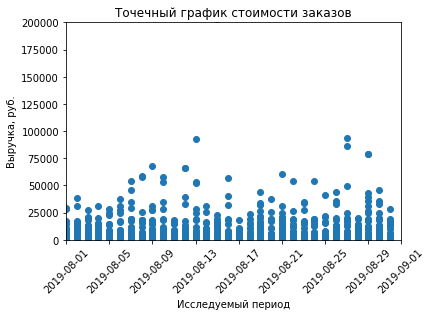

In [26]:
plt.scatter(orders['date'], orders['revenue'])

plt.xlabel('Исследуемый период')
plt.ylabel('Выручка, руб.')
plt.title('Точечный график стоимости заказов')
plt.axis(["2019-08-01", '2019-09-01', 0, 200000])
plt.xticks(rotation=45)

Выручка по дням не превышает 100000 руб., в целом наблюдаем равномерное распределения. Проседания в одной группе компенсируется другой и наоборот. Есть выбросы, но их минимум. 

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [27]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 1% заказов на сумму больше 58233,2 руб, и не более 5% всех заказов больше 28000 руб.

#### Промежуточный результат
    •	Оценили результаты A/B-теста визуально и выяснили, что в данных есть выбросы;
    •	Увидели выбросы и нашли границу для их определения, по заказам >2 шт и по выручке >28000 руб.
    на одного уникального пользователя


Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

In [28]:
#группируем визиты по дням для группы A 
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#группируем визиты по дням для группы B
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#группируем заказы по дням для группы A 
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

#группируем заказы по дням для группы B
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

#сводная итоговая таблица куммулитивных метрик по группам, заказам, и визитам по дням 
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

    Гипотеза H0: считаем, что отсутствуют статистически значимые различия конверсий между группами, иначе говоря, считаем что они равны.  
    Гипотеза H1: иначе, различия имеют вес и статистически значимы, иначе говоря, они отличаются 

In [29]:
#для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. Делаем группировку по группам
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

#Нули для пользователей, которые ничего не заказывали. 
#Их количество равно разнице между суммой посетителей и количеством записей о заказах
#Список индексов создали функцией np.arange().
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                              .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                               .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

#Применим критерий и отформатируем p-value, округлив его до 5 знаков после запятой.
#Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. 
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

#Относительное различие конверсии группы B:
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB']
                        .sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))


0.00840
0.138


- P-value меньше 0.05, потому нулевую гипотезу об отсутствии статистически значимых различий между группами отвергаем. 
- Анализ «сырых данных» показывает, что в конверсии между группами есть статистически значимые различия, это подтверждает различия в конверсии групп. 
- Относительный прирост конверсии группы B к конверсии группы A равен 13.8%. 

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

    Гипотеза H0: считаем, что отсутствуют статистически значимые различия в среднем чеке между группами, иначе говоря. они равны
    Гипотеза H1: иначе, различия имеют вес и статистически значимы, иначе говоря, они отличаются

In [30]:
#Выведем p-value по критерию mannwhitney для выручки из выборки A и B
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))

#Относительный прирост среднего чека группы B к среднему чеку группы A
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


- P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. 
- Относительное различие среднего чека между сегментами 25,9%, что говорит о существенных отличиях межжду покупателями двух групп по сырым данным с учетом аномалий. 

Либо клиенты группы B более состоятельнее клиентов группы A, либо мы имеем дело с аномалиями, которые искажают наши результаты. 

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

In [31]:
#очищаем данные от аномалий с помощью срезов
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

#создаем файл с нашими аномалиями 
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

    Гипотеза H0: считаем, что отсутствуют статистически значимые различия в конверсии между группами, 
    но уже по очищенным данным, иначе говоря, они равны
    Гипотеза H1: иначе, различия имеют вес и статистически значимы, иначе говоря, они отличаются

In [32]:
#Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                    .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']
                    .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                    .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']
                    .sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

#при этом, мы удаляем не сами заказы, а пользователей с заказами, 
#которые считаем аномальныи  с помощью выражения isin(abnormalUsers)

#Применим статистический критерий Манна-Уитни к полученным выборкам:
print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.00652
0.173


- После удаления аномалий статистическая значимость достигнута, результаты аналогичны сырым данным. 
- Группа B значительно лучше группы A, по очищенным данным различия в конверсии составили 17,3% в пользу группы B. 

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

    Гипотеза H0: считаем, что отсутствуют статистически значимые различия в среднем чеке между группами, 
    но уже по очищенным данным, иначе говоря, они равны
    Гипотеза H1: иначе, различия имеют вес и статистически значимы, иначе говоря, они отличаются

In [33]:
#проводим стат.тест по критерию mannwhitneyu по выручке без учета аномальных заказов abnormalUsers.
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

#считаем относительную разницу среднего чека по очищеным данным без учета аномальных заказов abnormalUsers.
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId']\
                                                              .isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId']\
                                                              .isin(abnormalUsers)))]['revenue'].mean() - 1))

0.369
-0.020


- Мы не можем отвергнуть нулевую гипотезу об отстутсвие статистически значимых различий между группами. Похоже различий нет.
- P-value больше 0,05. Относительная разница по очищеным данным в пользу группы A на 2%.
- По очищенным данным средний чек примерно одинаковый. 

В итоге за счет дорогих заказов группа B выросла по выручке, но в целом это две статистически идентичные группы по данному показателю

### Необъходимо принять решение по результатам теста и объяснить его. 
#### Варианты решений: 
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

### [Вывод](#Содержание) <a id="3"></a> 

#####  Решение: 
1 по конверсии, у группы B она получше, но по среднему чеку ответ 2, отсутствуют существенные различия по группам. 

- С точки зрения маркетинга, при привлечении большего числа клиентов группа B принесет больше прибыли, поэтому ключевым является показатель конверсии. 

- С точки зрения денежных потоков, ключевым показателем является средний чек пользователя. Однозначно, продолжать тест не имеет смысла, так как основные цели тестирования достигнуты. 

С использованием фреймворков оценили список гипотез на жизнеспособность. Оказалось, что наиболее привлекательные гипотезы 0 и 7. Далее построили графики комулятивного среднего чека, выручки, визитов, оценили выбросы, и пришли к выводу, что с 18 по 19 августа 2018 года в группе B появились выбросы - дорогие заказы. Они повлияли на статистическую оценку данных. По сырым данным были сомнения, считалось, что выбросы повлияли на конверсию и группы одинаковые. Но нет, по очищеным данным группа B все же прибыльнее, а средний чек у них примерно равный. Просто группа B приводит больше лояльных клиентов. 